In [1]:
import numpy as np
import pandas as pd
import requests as rq
import os
import csv
import matplotlib.pyplot as plt
% matplotlib inline
import zipfile as zip

UsageError: Line magic function `%` not found.


In [5]:
df_twt = pd.read_csv('twitter-archive-enhanced.csv')
df_twt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [66]:
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [44]:
folder_name = 'download'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
response = rq.get(url)

with open(os.path.join(folder_name, file_name), mode='wb') as file:
         file.write(response.content)

In [45]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
response = rq.get(url)

with open(file_name, mode='wb') as file:
         file.write(response.content)

In [6]:
df_img = pd.read_csv('image-predictions.tsv', sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
list_tweet_id = df_twt['tweet_id'].tolist()
list_tweet_id

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [52]:
tweet = list_tweet_id[0]
tweet

892420643555336193

In [53]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [55]:
api.get_status(tweet, tweet_mode='extended').retweet_count

7744

In [56]:
api.get_status(tweet, tweet_mode='extended').favorite_count

36391

In [67]:
folder_twt_name = 'tweet_add_info'
if not os.path.exists(folder_twt_name):
    os.makedirs(folder_twt_name)

twt_add_info_list = []
twt_errors_list = {}

for twt in list_tweet_id:
    try:
        tweet_id = twt
        retweet_count = api.get_status(twt, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True).retweet_count
        favorite_count = api.get_status(twt, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True).favorite_count
        twt_add_info_list.append({'tweet_id': tweet_id,
                                  'retweet_count': retweet_count,
                                  'favorite_count': favorite_count})
    except Exception as e:
        print(str(tweet_id) + " - " + str(e))
        twt_errors_list[int(tweet_id)] = tweet_id

    twt_add_info = pd.DataFrame(twt_add_info_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

888202515573088257 - [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 - [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 - [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 - [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 - [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 - [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 - [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 - [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 - [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 - [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 - [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 - [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 - [{'code

Rate limit reached. Sleeping for: 175


779123168116150273 - [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 - [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 - [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770743923962707968 - [{'code': 144, 'message': 'No status found with that ID.'}]
759566828574212096 - [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 - [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 58
Rate limit reached. Sleeping for: 71


680055455951884288 - [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 75


In [79]:
len(twt_add_info), len(list_tweet_id), len(df_img), len(df_twt)

(2331, 2356, 2075, 2356)

In [71]:
twt_add_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7744,36393
1,892177421306343426,5733,31340
2,891815181378084864,3794,23615
3,891689557279858688,7907,39689
4,891327558926688256,8530,37890


In [72]:
twt_add_info.to_csv('twt_add_info.csv', index=False)

In [9]:
twt_add_info = pd.read_csv('twt_add_info.csv')

In [10]:
twitter_merged = df_twt.merge(twt_add_info, how='left')
twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_merged = twitter_merged.merge(df_img, how='left')
twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
sum(twitter_merged.duplicated())

0

In [13]:
twitter_merged.iloc[:5, 20:30]

,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [14]:
twitter_merged[twitter_merged['p1'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
twitter_merged.source[0], twitter_merged.expanded_urls[0]

('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'https://twitter.com/dog_rates/status/892420643555336193/photo/1')

In [16]:
twitter_merged.doggo.value_counts(), twitter_merged.floofer.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64)

In [17]:
twitter_merged.doggo.sample(15)

2158    None
2077    None
1429    None
1693    None
2152    None
0       None
1687    None
908     None
1338    None
1210    None
1660    None
335     None
1239    None
2137    None
792     None
Name: doggo, dtype: object

In [18]:
twitter_merged.img_num.value_counts()

1.0    1780
2.0     198
3.0      66
4.0      31
Name: img_num, dtype: int64

In [19]:
twitter_merged.p1.value_counts().sample(20)

coil                      1
doormat                   8
boathouse                 1
microphone                1
barbell                   1
revolver                  1
koala                     2
cairn                     3
minivan                   5
kelpie                   11
African_grey              1
electric_fan              1
Samoyed                  43
dishwasher                3
Norfolk_terrier           7
walking_stick             1
lacewing                  1
tailed_frog               1
Appenzeller               2
flat-coated_retriever     8
Name: p1, dtype: int64

## Assess

##### Tidiness issues
- 1. Merge all databases/tables - **ok**
- 2. 'doggo', 'floofer', 'pupper', 'puppo' formats (merge all columns into 1 column 'dog_stage') - **ok** 

##### Quality issues
- 1. Retweets (retweeted_status_id is not Null) - **ok**
- 2. Replies ('in_reply_to_status_id', 'in_reply_to_user_id') - **ok**
- 3. 'timestamp' format (datetime) - **ok**
- 4. 'p1_dog', 'p2_dog', 'p3_dog' formats (binary categories) - **ok**
- 5. 'retweet_count', 'favorite_count' (int) - **ok**
- 6. Unnecessary columns - **ok**
- 7. Rows with different rating denominator basis (for comparison purpose - It is hard to compare variables in different basis) - **ok**
- 8. Meaningful Null values (jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) - **ok**
- 9. Some Null values (expanded_urls, retweet_count, favorite_count) - **ok**
- 10. Some names are not existing names - **ok**
- 11. 'rating_numerator' inconsistent with 'text' -**ok**

## Cleaning

In [396]:
twitter_clean = twitter_merged.copy()

##### Define
- Drop Retweets (retweeted_status_id is not Null)

##### Code

In [397]:
retweet = twitter_clean[twitter_clean['retweeted_status_id'].notnull()]['tweet_id']
retweet

19      888202515573088257
32      886054160059072513
36      885311592912609280
68      879130579576475649
73      878404777348136964
               ...        
1023    746521445350707200
1043    743835915802583040
1242    711998809858043904
2259    667550904950915073
2260    667550882905632768
Name: tweet_id, Length: 181, dtype: int64

In [398]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]

##### Test

In [399]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

##### Define
- Drop replies ('in_reply_to_status_id')

##### Code

In [400]:
twitter_clean = twitter_clean[twitter_clean['in_reply_to_status_id'].isnull()]

##### Test

In [401]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

##### Define
- Change data type of 'timestamp'

##### Code

In [402]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

##### Test

In [403]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Define
- Change datatype of 'p1_dog', 'p2_dog', 'p3_dog' to category 

##### Code

In [404]:
twitter_clean.p1_dog = twitter_clean.p1_dog.astype('category')
twitter_clean.p2_dog = twitter_clean.p2_dog.astype('category')
twitter_clean.p3_dog = twitter_clean.p3_dog.astype('category')

##### Test

In [405]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

##### Define
- Exclude Null rows of 'retweet_count'
- Change data type of 'retweet_count', 'favorite_count' to int

##### Code

In [406]:
twitter_clean.retweet_count.sort_values()

2339    11.0
2319    18.0
1237    25.0
2224    29.0
2327    32.0
        ... 
296      NaN
363      NaN
750      NaN
932      NaN
1726     NaN
Name: retweet_count, Length: 2097, dtype: float64

In [407]:
twitter_clean = twitter_clean[pd.notnull(twitter_clean.retweet_count)]

In [408]:
twitter_clean.retweet_count = twitter_clean.retweet_count.astype(int)

In [409]:
twitter_clean.favorite_count = twitter_clean.favorite_count.astype(int)

##### Test

In [410]:
twitter_clean.retweet_count.sort_values()

2339       11
2319       18
1237       25
2224       29
2327       32
        ...  
66      40797
413     44095
534     57068
1079    57998
1039    78255
Name: retweet_count, Length: 2090, dtype: int32

In [411]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2090 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2090 non-null   datetime64[ns, UTC]
 4   source                      2090 non-null   object             
 5   text                        2090 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2087 non-null   object             
 10  rating_numerator            2090 non-null   int64           

##### Define
- Drop unnecessary columns

##### Code

In [412]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 
                                    'in_reply_to_user_id', 
                                    'retweeted_status_id', 
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp'], axis=1)

##### Test

In [413]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2090 non-null   int64              
 1   timestamp           2090 non-null   datetime64[ns, UTC]
 2   source              2090 non-null   object             
 3   text                2090 non-null   object             
 4   expanded_urls       2087 non-null   object             
 5   rating_numerator    2090 non-null   int64              
 6   rating_denominator  2090 non-null   int64              
 7   name                2090 non-null   object             
 8   doggo               2090 non-null   object             
 9   floofer             2090 non-null   object             
 10  pupper              2090 non-null   object             
 11  puppo               2090 non-null   object             
 12  retweet_count       2090 non-null 

##### Define
- Merge all columns ('doggo', 'floofer', 'pupper', 'puppo') into 1 column ('dog_stage')

##### Code

In [414]:
twitter_clean.iloc[:3, 15:]

,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [415]:
twitter_clean.doggo = twitter_clean.doggo.replace('None', '')
twitter_clean.floofer = twitter_clean.floofer.replace('None', '')
twitter_clean.pupper = twitter_clean.pupper.replace('None', '')
twitter_clean.puppo = twitter_clean.puppo.replace('None', '')

In [416]:
twitter_clean['doggo'].sort_values()

0            
1642         
1641         
1640         
1639         
        ...  
1117    doggo
191     doggo
881     doggo
899     doggo
351     doggo
Name: doggo, Length: 2090, dtype: object

In [417]:
twitter_clean['dog_stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [418]:
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('', np.nan)

In [419]:
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('doggofloofer', 'doggo, floofer')
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('doggopupper', 'doggo, pupper')
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('doggopuppo', 'doggo, puppo')

In [420]:
twitter_clean = twitter_clean.drop(['doggo',
                                    'floofer', 
                                    'pupper', 
                                    'puppo'], axis=1)

##### Test

In [421]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7744,36393,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5733,31340,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3794,23615,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7907,39689,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8530,37890,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [422]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2090 non-null   int64              
 1   timestamp           2090 non-null   datetime64[ns, UTC]
 2   source              2090 non-null   object             
 3   text                2090 non-null   object             
 4   expanded_urls       2087 non-null   object             
 5   rating_numerator    2090 non-null   int64              
 6   rating_denominator  2090 non-null   int64              
 7   name                2090 non-null   object             
 8   retweet_count       2090 non-null   int32              
 9   favorite_count      2090 non-null   int32              
 10  jpg_url             1964 non-null   object             
 11  img_num             1964 non-null   float64            
 12  p1                  1964 non-null 

In [423]:
twitter_clean.groupby('dog_stage')['tweet_id'].count()

dog_stage
doggo              71
doggo, floofer      1
doggo, pupper       9
doggo, puppo        1
floofer             9
pupper            221
puppo              23
Name: tweet_id, dtype: int64

In [424]:
twitter_clean = twitter_clean[twitter_clean['p1'].notnull()]

##### Define
- Exclude rows with rating denominator != 10

##### Code

In [425]:
twitter_clean = twitter_clean[twitter_clean['rating_denominator'] == 10]

##### Test

In [426]:
twitter_clean.rating_denominator.sort_values()

0       10
1675    10
1674    10
1673    10
1672    10
        ..
891     10
889     10
888     10
923     10
2355    10
Name: rating_denominator, Length: 1947, dtype: int64

#### Define
- Change 'typos' to 'None' in the column 'name' - **ok**

#### Code

In [427]:
twitter_clean.groupby('name')['tweet_id'].count().sort_values(ascending=False).iloc[:15]

name
None       513
a           54
Cooper      10
Charlie     10
Oliver      10
Lucy         9
Penny        9
Tucker       9
Sadie        8
Winston      8
Daisy        7
Lola         7
Toby         7
the          7
Stanley      6
Name: tweet_id, dtype: int64

In [428]:
type(twitter_clean['name'][0])

str

In [429]:
lower_name_list = []

for name in twitter_clean.name:
    if name.islower():
        print(name)
        x = name
    else:
        np.nan
    
    lower_name_list.append(x)

such
a
quite
quite
one
incredibly
a
a
very
my
one
not
his
one
a
a
a
an
very
a
just
getting
very
unacceptable
all
a
a
infuriating
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
the
the
a
a
an
a
a
a
a


In [430]:
lower_name_list = np.unique(lower_name_list)

In [431]:
lower_name_list

array(['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly',
       'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one',
       'quite', 'space', 'such', 'the', 'unacceptable', 'very'],
      dtype='<U12')

In [432]:
twitter_clean.name = twitter_clean.name.replace(lower_name_list, 'None')

#### Test

In [433]:
twitter_clean.groupby('name')['tweet_id'].count().sort_values(ascending=False).iloc[:15]

name
None       608
Charlie     10
Oliver      10
Cooper      10
Lucy         9
Penny        9
Tucker       9
Winston      8
Sadie        8
Daisy        7
Toby         7
Lola         7
Stanley      6
Koda         6
Bo           6
Name: tweet_id, dtype: int64

In [434]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1947 non-null   int64              
 1   timestamp           1947 non-null   datetime64[ns, UTC]
 2   source              1947 non-null   object             
 3   text                1947 non-null   object             
 4   expanded_urls       1947 non-null   object             
 5   rating_numerator    1947 non-null   int64              
 6   rating_denominator  1947 non-null   int64              
 7   name                1947 non-null   object             
 8   retweet_count       1947 non-null   int32              
 9   favorite_count      1947 non-null   int32              
 10  jpg_url             1947 non-null   object             
 11  img_num             1947 non-null   float64            
 12  p1                  1947 non-null 

##### Define
- Change the 'rating_numerator' column to be consistent with the twitter 'text'

##### Code

In [435]:
type(twitter_clean['text'][0])

str

In [438]:
twitter_clean['ratings'] = twitter_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [439]:
type(twitter_clean['ratings'][0])

str

In [440]:
twitter_clean.ratings = twitter_clean.ratings.astype(float)

In [441]:
twitter_clean.groupby('ratings')['tweet_id'].count()

ratings
0.00         1
1.00         4
2.00         9
3.00        19
4.00        15
5.00        32
6.00        32
7.00        51
8.00        95
9.00       149
9.75         1
10.00      416
11.00      392
11.26        1
11.27        1
12.00      444
13.00      249
13.50        1
14.00       33
420.00       1
1776.00      1
Name: tweet_id, dtype: int64

In [442]:
twitter_clean.groupby('rating_numerator')['tweet_id'].count()

rating_numerator
0         1
1         4
2         9
3        19
4        15
5        33
6        32
7        51
8        95
9       149
10      416
11      392
12      444
13      249
14       33
26        1
27        1
75        1
420       1
1776      1
Name: tweet_id, dtype: int64

In [443]:
twitter_clean.query('ratings == "1776"').iloc[0, 3]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [444]:
twitter_clean.query('ratings == "420"').iloc[0, 3]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [445]:
twitter_clean.query('ratings == "9.75"').iloc[0, 3]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [446]:
twitter_clean.rating_numerator = twitter_clean.ratings

In [447]:
twitter_clean = twitter_clean.drop(['ratings'], axis=1)

##### Test

In [448]:
twitter_clean.groupby('rating_numerator')['tweet_id'].count()

rating_numerator
0.00         1
1.00         4
2.00         9
3.00        19
4.00        15
5.00        32
6.00        32
7.00        51
8.00        95
9.00       149
9.75         1
10.00      416
11.00      392
11.26        1
11.27        1
12.00      444
13.00      249
13.50        1
14.00       33
420.00       1
1776.00      1
Name: tweet_id, dtype: int64

### Final test (double check)

In [449]:
twitter_clean.iloc[:10, 10:]

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


In [450]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1947 non-null   int64              
 1   timestamp           1947 non-null   datetime64[ns, UTC]
 2   source              1947 non-null   object             
 3   text                1947 non-null   object             
 4   expanded_urls       1947 non-null   object             
 5   rating_numerator    1947 non-null   float64            
 6   rating_denominator  1947 non-null   int64              
 7   name                1947 non-null   object             
 8   retweet_count       1947 non-null   int32              
 9   favorite_count      1947 non-null   int32              
 10  jpg_url             1947 non-null   object             
 11  img_num             1947 non-null   float64            
 12  p1                  1947 non-null 

In [451]:
sum(twitter_clean.duplicated())

0

In [452]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.947000e+03,1947.000000,1947.0,1947.000000,1947.000000,1947.000000,1947.000000,1.947000e+03,1.947000e+03
mean,7.359621e+17,11.653713,10.0,2481.368259,8373.555213,1.202363,0.593429,1.349518e-01,6.023287e-02
std,6.760085e+16,41.125325,0.0,4438.765094,12307.849795,0.560002,0.272343,1.010519e-01,5.083402e-02
min,6.660209e+17,0.000000,10.0,11.000000,72.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757900e+17,10.000000,10.0,553.000000,1779.000000,1.000000,0.360447,5.388625e-02,1.608055e-02
50%,7.084797e+17,11.000000,10.0,1200.000000,3788.000000,1.000000,0.587101,1.176080e-01,4.952370e-02
75%,7.880951e+17,12.000000,10.0,2840.000000,10461.000000,1.000000,0.845942,1.961285e-01,9.164355e-02
max,8.924206e+17,1776.000000,10.0,78255.000000,157113.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


In [453]:
twitter_clean.rating_numerator.sort_values(), twitter_clean.rating_denominator.sort_values() 

(315        0.0
 2261       1.0
 1869       1.0
 2091       1.0
 2338       1.0
          ...  
 426       14.0
 76        14.0
 164       14.0
 2074     420.0
 979     1776.0
 Name: rating_numerator, Length: 1947, dtype: float64, 0       10
 1675    10
 1674    10
 1673    10
 1672    10
         ..
 891     10
 889     10
 888     10
 923     10
 2355    10
 Name: rating_denominator, Length: 1947, dtype: int64)

### Storing clean DataFrame

In [454]:
twitter_archive_master = twitter_clean.copy()

In [455]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [457]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///twitter_archive_master.db')
twitter_archive_master.to_sql('master5', engine, index=False)
twitter_archive_master_db = pd.read_sql('SELECT * From master5', engine)

In [458]:
twitter_archive_master_db.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56.000000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7744,36393,...,orange,0.097049,0,bagel,0.085851,0,banana,0.076110,0,None
1,892177421306343426,2017-08-01 00:17:27.000000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5733,31340,...,Chihuahua,0.323581,1,Pekinese,0.090647,1,papillon,0.068957,1,None
2,891815181378084864,2017-07-31 00:18:03.000000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,3794,23615,...,Chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1,None
3,891689557279858688,2017-07-30 15:58:51.000000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7907,39689,...,paper_towel,0.170278,0,Labrador_retriever,0.168086,1,spatula,0.040836,0,None
4,891327558926688256,2017-07-29 16:00:24.000000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,8530,37890,...,basset,0.555712,1,English_springer,0.225770,1,German_short-haired_pointer,0.175219,1,None


In [459]:
twitter_archive_master_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1947 non-null   int64  
 1   timestamp           1947 non-null   object 
 2   source              1947 non-null   object 
 3   text                1947 non-null   object 
 4   expanded_urls       1947 non-null   object 
 5   rating_numerator    1947 non-null   float64
 6   rating_denominator  1947 non-null   int64  
 7   name                1947 non-null   object 
 8   retweet_count       1947 non-null   int64  
 9   favorite_count      1947 non-null   int64  
 10  jpg_url             1947 non-null   object 
 11  img_num             1947 non-null   float64
 12  p1                  1947 non-null   object 
 13  p1_conf             1947 non-null   float64
 14  p1_dog              1947 non-null   object 
 15  p2                  1947 non-null   object 
 16  p2_con

### Analyzing and Visualizing Data

In [460]:
ratings = twitter_archive_master.groupby('rating_numerator')['tweet_id'].count()
ratings

rating_numerator
0.00         1
1.00         4
2.00         9
3.00        19
4.00        15
5.00        32
6.00        32
7.00        51
8.00        95
9.00       149
9.75         1
10.00      416
11.00      392
11.26        1
11.27        1
12.00      444
13.00      249
13.50        1
14.00       33
420.00       1
1776.00      1
Name: tweet_id, dtype: int64

In [461]:
ratings_clean = twitter_archive_master[twitter_archive_master['rating_numerator'] <= 20]
ratings_clean.tweet_id.count()

1945

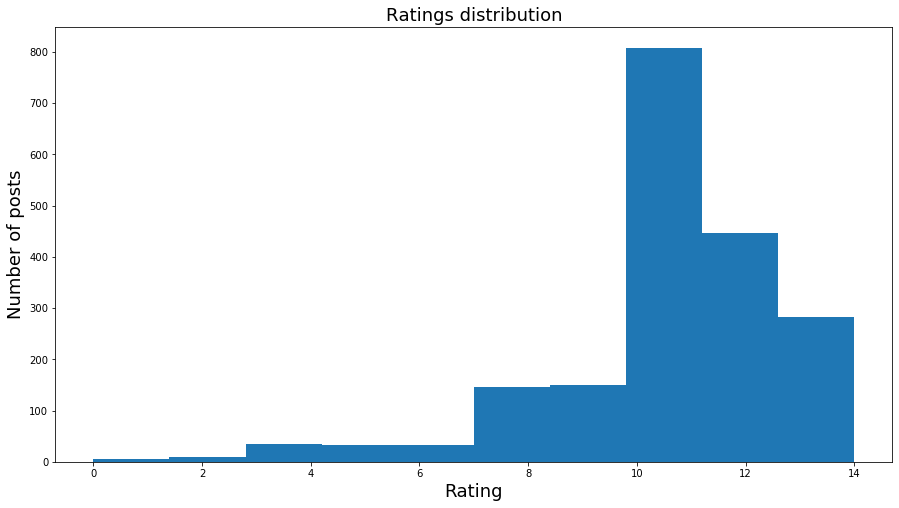

In [462]:
ratings_clean.rating_numerator.plot(kind='hist', figsize=(15,8));
plt.title('Ratings distribution', fontsize=18);
plt.xlabel('Rating', fontsize=18);
plt.ylabel('Number of posts', fontsize=18);

In [463]:
retweet_clean = twitter_archive_master[twitter_archive_master['retweet_count'] <= 30000]
retweet_clean.tweet_id.count()

1937

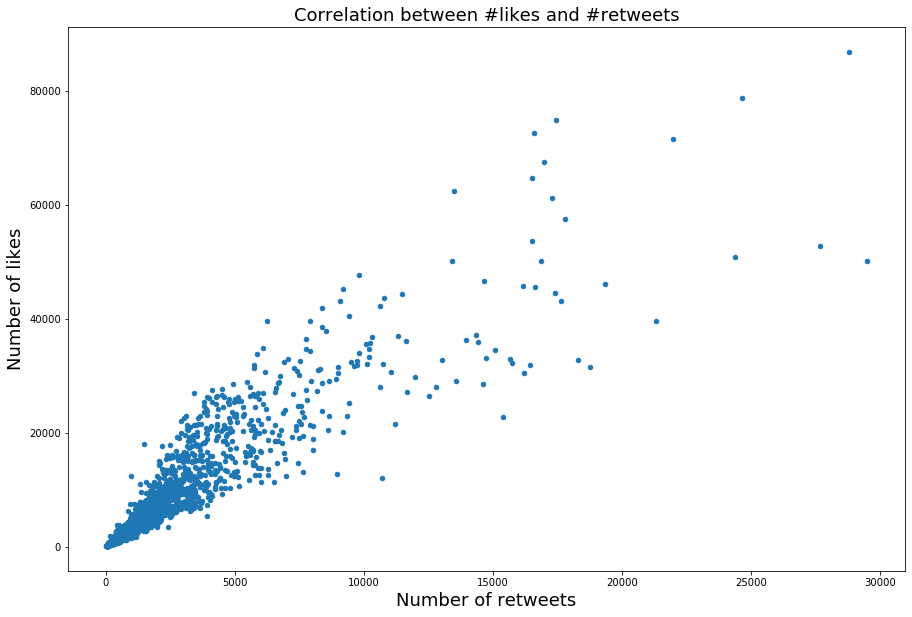

In [464]:
retweet_clean.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(15,10));
plt.title('Correlation between #likes and #retweets', fontsize=18);
plt.xlabel('Number of retweets', fontsize=18);
plt.ylabel('Number of likes', fontsize=18);

In [465]:
dog_stage_clean = twitter_archive_master
dog_stage_clean.dog_stage = twitter_archive_master.dog_stage.replace(np.nan, 'None')
dog_stage_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7744,36393,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5733,31340,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,3794,23615,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7907,39689,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,8530,37890,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [466]:
dog_stage_clean.tweet_id.count()

1947

In [467]:
likes_by_dog_stage = dog_stage_clean.groupby('dog_stage')['favorite_count'].sum()
likes_by_dog_stage = likes_by_dog_stage.sort_values(ascending=False)
likes_by_dog_stage

dog_stage
None              13053868
pupper             1357580
doggo              1176785
puppo               463212
doggo, pupper       106497
floofer              84871
doggo, puppo         44581
doggo, floofer       15918
Name: favorite_count, dtype: int32

In [468]:
posts_by_dog_stage = dog_stage_clean.groupby('dog_stage')['tweet_id'].count()
posts_by_dog_stage = posts_by_dog_stage.sort_values(ascending=False)
posts_by_dog_stage

dog_stage
None              1645
pupper             201
doggo               62
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: tweet_id, dtype: int64

In [469]:
likes_per_post = likes_by_dog_stage / posts_by_dog_stage
likes_per_post = likes_per_post.sort_values(ascending=False)
likes_per_post

dog_stage
doggo, puppo      44581.000000
puppo             21055.090909
doggo             18980.403226
doggo, floofer    15918.000000
doggo, pupper     13312.125000
floofer           12124.428571
None               7935.482067
pupper             6754.129353
dtype: float64

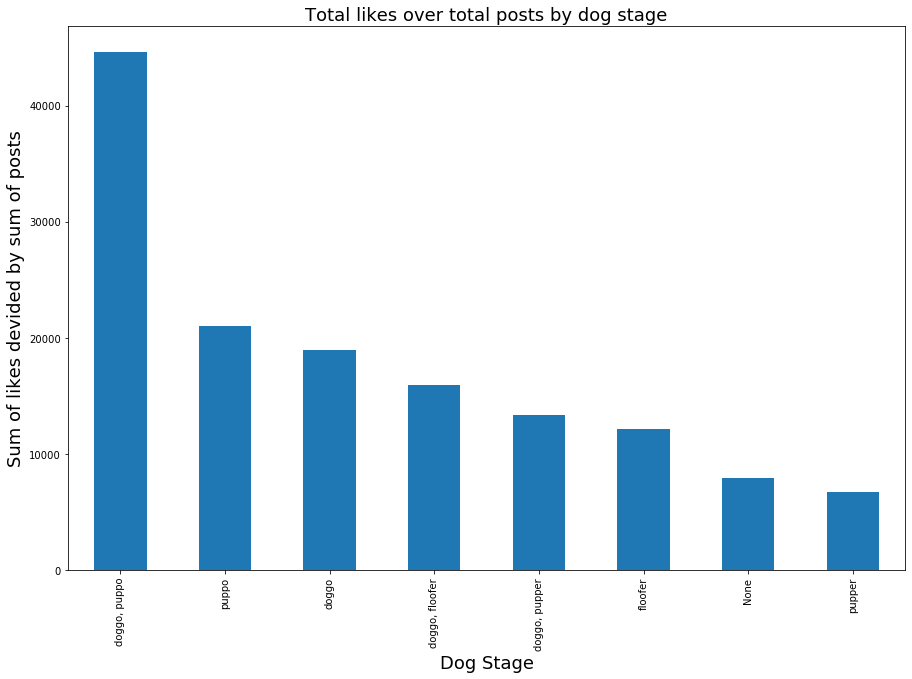

In [470]:
likes_per_post.plot(kind='bar', figsize=(15,10));
plt.title('Total likes over total posts by dog stage', fontsize=18);
plt.xlabel('Dog Stage', fontsize=18);
plt.ylabel('Sum of likes devided by sum of posts', fontsize=18);